# Wranging and Exploratory Data Analysis

## Loading pandas

In [1]:
import pandas as pd


## Loading the R magic along with the tidyverse

In [2]:
%load_ext rpy2.ipython
%R R.version.string
%R library(tidyverse); library(GGally)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



'GGally','forcats','stringr',...,'datasets','methods','base'


## Loading the data

In [3]:
datapy = pd.read_csv('data/housing.csv')
print(datapy.info())
print(datapy.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
IN

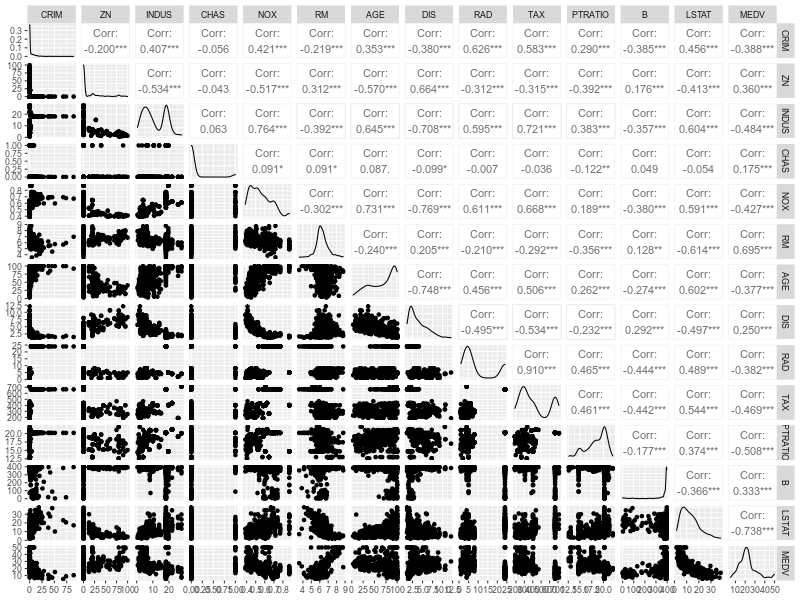

In [4]:
%%R -i datapy -w 800 -h 600

print(ggpairs(datapy))

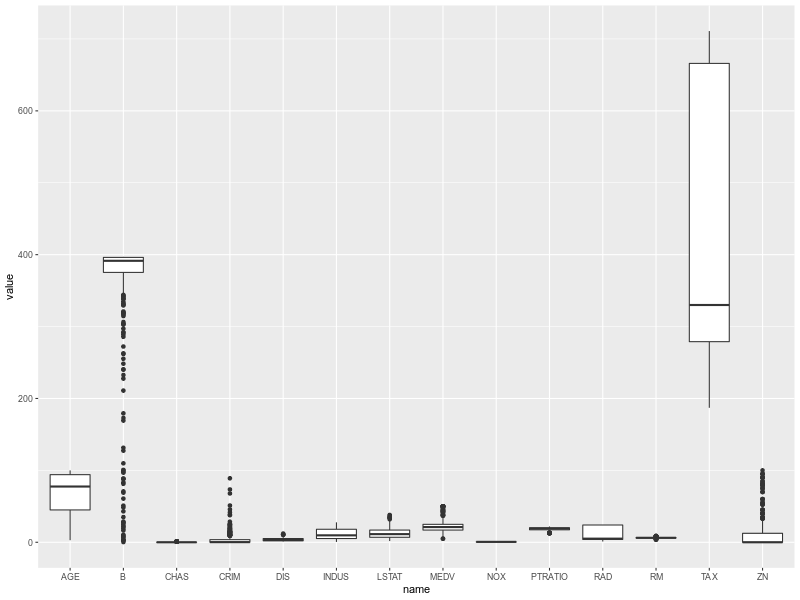

In [9]:
%%R -i datapy -w 800 -h 600

datapy %>%
  pivot_longer(cols = everything()) %>%
  ggplot(aes(x = name, y = value)) +
  geom_boxplot()

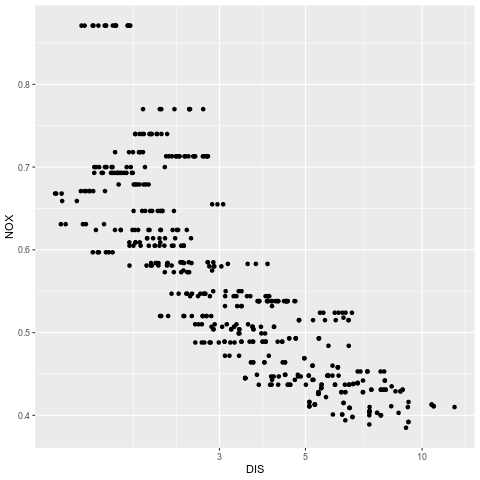

In [6]:
%%R -i datapy -o datapy_tidy

datapy <- as_tibble(datapy)

datapy_tidy <- datapy

datapy %>%
  count(fct_cross(factor(ZN > 0), factor(CRIM < 5)))

datapy %>%
  ggplot(aes(x=DIS, y=NOX)) +
  geom_point() +
  scale_x_log10()



## Saving the output for modeling

In [7]:
datapy_tidy.to_csv('data/housing_tidy.csv',index=False)